# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [3]:
attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,1,6,3,3,2,2,2,2,4


## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  

In [4]:
df = attrition_data
#Drop columns that don't matter
df1 = df.drop(['EmployeeCount', 'EmployeeNumber', 'ID'], axis = 1)
#One-hot encoding
df2 = pd.get_dummies(df1[list(df1)], drop_first=True)
df3 = df2.iloc[:,:24]

In [5]:
Y = df2['Attrition']
X = df2.drop(['Attrition'], axis = 1)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
to_drop2 = [column for column in upper.columns if any(upper[column] < - 0.9)]
X = X.drop(X[to_drop+to_drop2], axis=1)
print('Dropped columns are',to_drop+to_drop2)

Dropped columns are ['MonthlyIncome', 'Department_Sales']


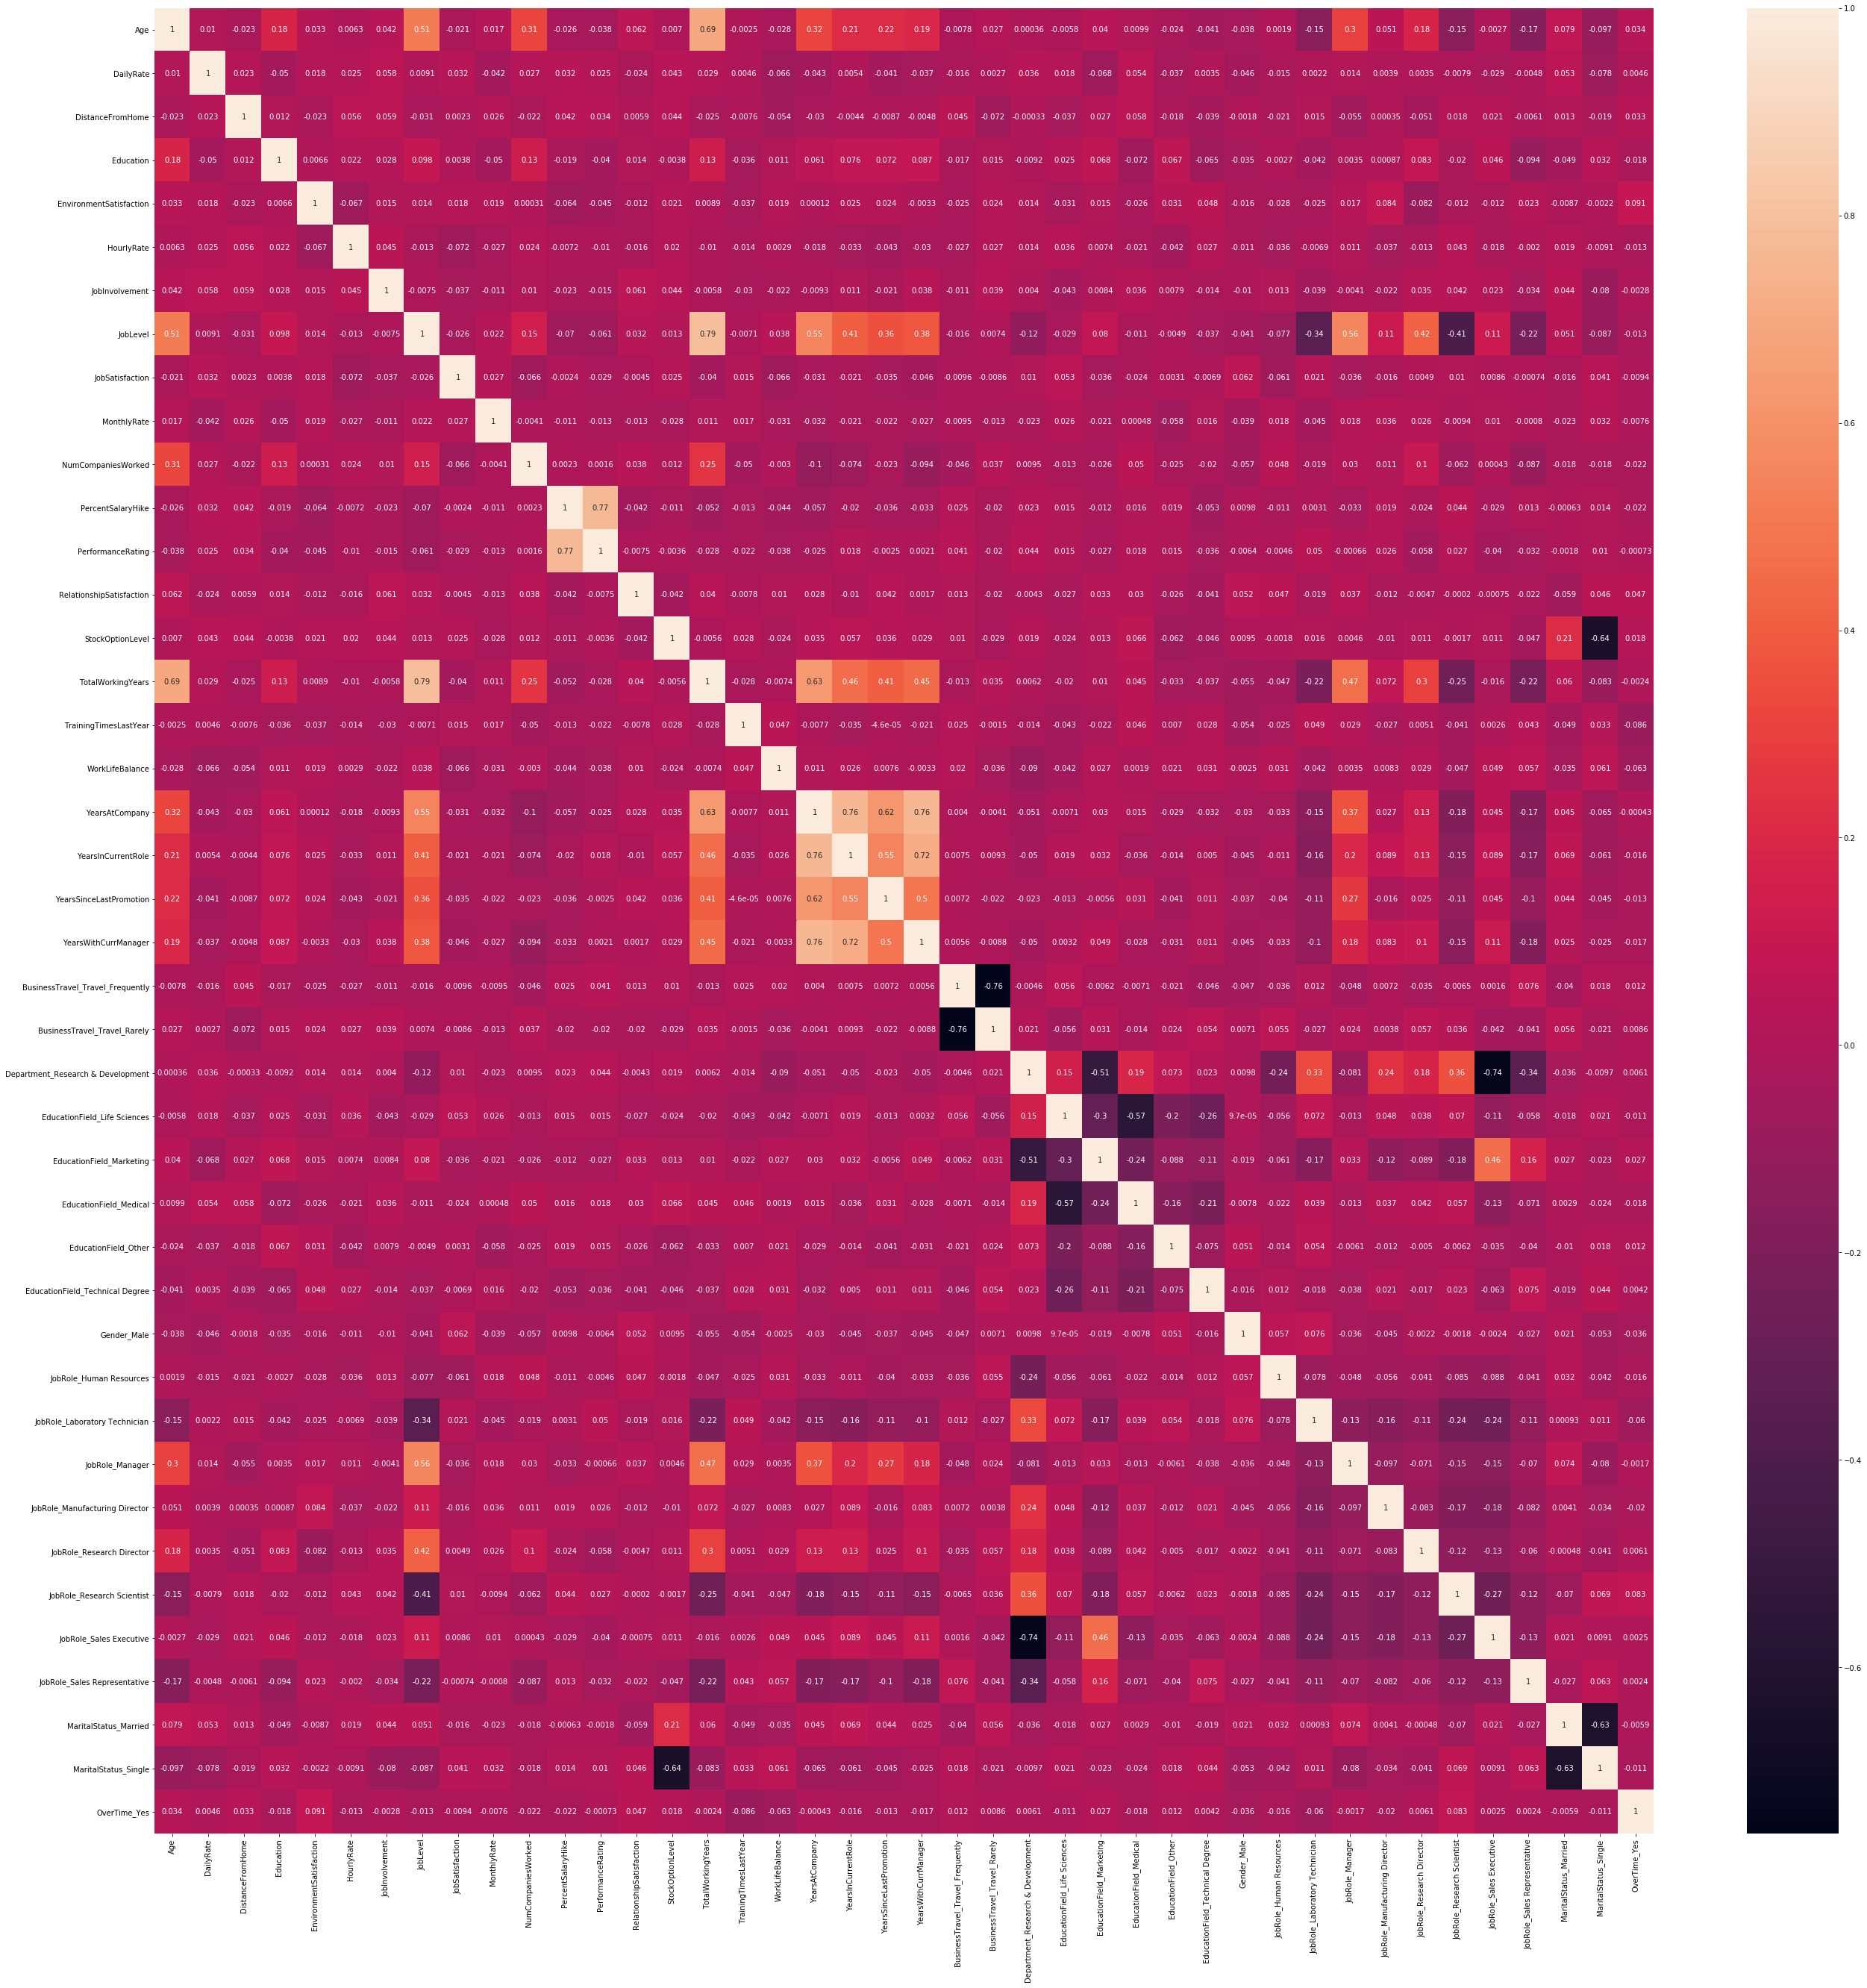

In [7]:
plt.figure(figsize=(45, 45))
s = sns.heatmap(X.corr(), annot=True)
fig = s.get_figure()
#fig.savefig("Correlation_map.pdf", bbox_inches='tight')

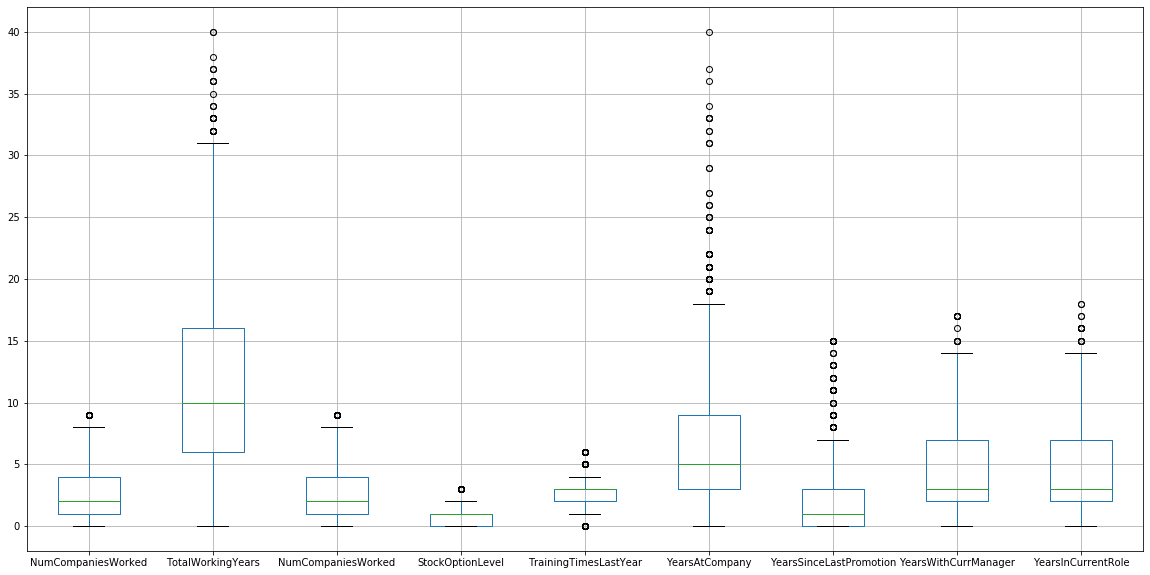

In [8]:
plt.figure(figsize=(20, 10))
b = X.boxplot(column=['NumCompaniesWorked','TotalWorkingYears','NumCompaniesWorked','StockOptionLevel',
                  'TrainingTimesLastYear','YearsAtCompany', 'YearsSinceLastPromotion','YearsWithCurrManager','YearsInCurrentRole'])
fig2 = b.get_figure()
#fig2.savefig("Boxplot.pdf", bbox_inches='tight')

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)#, stratify = Y)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

pca = PCA(n_components = 36)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
  
clf = svm.SVC(C = 0.9e2 , kernel = 'rbf', gamma = 1e-2, probability=True)
clf.fit(X_train,Y_train)

Y_pred =  clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.8737864077669902

In [11]:
#Some classifiers and their accuracies:
clf2 = svm.SVC(C = 0.9e2 , kernel = 'rbf', gamma = 1e-2)
clf4 = svm.SVC(C = 1.37e+5 , kernel = 'rbf', degree = 2, gamma = 1.1e-6)
clf6 = svm.SVC(C = 1e2 , kernel = 'sigmoid', gamma = 3e-3)
clf7 = RandomForestClassifier(n_estimators=35 ,criterion="entropy")
#clf8 = XGB(random_state=0 , ccp_alpha = 1)
clf9 = KNeighborsClassifier(n_neighbors = 15, weights='distance')
clf10 = AdaBoostClassifier()
clf11 = GradientBoostingClassifier()

scaler2 = StandardScaler()
min_max_scaler2 = preprocessing.MinMaxScaler()
pca2  = PCA(n_components = 39)
X_score = scaler2.fit_transform(X)
X_score = min_max_scaler2.fit_transform(X_score)
X_score = pca2.fit_transform(X_score)

metrics = {'accuracy', 'precision', 'recall', 'roc_auc'}
scores2 = cross_validate(clf2, X_score, Y, cv=5, scoring = metrics)
scores4 = cross_validate(clf4, X_score, Y, cv=5, scoring = metrics)
scores6 = cross_validate(clf6, X_score, Y, cv=5, scoring = metrics)
scores7 = cross_validate(clf7, X_score, Y, cv=5, scoring = metrics)
#scores8 = cross_validate(clf8, X_score, Y, cv=5, scoring = metrics)
scores9 = cross_validate(clf9, X_score, Y, cv=5, scoring = metrics)
scores10 = cross_validate(clf10, X_score, Y, cv=5, scoring = metrics)
scores11 = cross_validate(clf11, X_score, Y, cv=5, scoring = metrics)

df_print = pd.DataFrame(columns = ['Classifier', 'Accuracy', 'Precision', 'Recall', 'Area under ROC'])
df_print['Classifier'] = ['SVM (rbf)', 'SVM2 (rbf)', 'SVM (sigmoid)', 'Random Forest', 'K Nearest Neighbour', 'AdaBoost', 'Gradient Boosting']

df_print.iloc[0,:]['Accuracy':'Area under ROC'] = [scores2['test_accuracy'].mean(), scores2['test_precision'].mean(), scores2['test_recall'].mean(), scores2['test_roc_auc'].mean()]
df_print.iloc[1,:]['Accuracy':'Area under ROC'] = [scores4['test_accuracy'].mean(), scores4['test_precision'].mean(), scores4['test_recall'].mean(), scores4['test_roc_auc'].mean()]
df_print.iloc[2,:]['Accuracy':'Area under ROC'] = [scores6['test_accuracy'].mean(), scores6['test_precision'].mean(), scores6['test_recall'].mean(), scores6['test_roc_auc'].mean()]
df_print.iloc[3,:]['Accuracy':'Area under ROC'] = [scores7['test_accuracy'].mean(), scores7['test_precision'].mean(), scores7['test_recall'].mean(), scores7['test_roc_auc'].mean()]
df_print.iloc[4,:]['Accuracy':'Area under ROC'] = [scores9['test_accuracy'].mean(), scores9['test_precision'].mean(), scores9['test_recall'].mean(), scores9['test_roc_auc'].mean()]
df_print.iloc[5,:]['Accuracy':'Area under ROC'] = [scores10['test_accuracy'].mean(), scores10['test_precision'].mean(), scores10['test_recall'].mean(), scores10['test_roc_auc'].mean()]
df_print.iloc[6,:]['Accuracy':'Area under ROC'] = [scores11['test_accuracy'].mean(), scores11['test_precision'].mean(), scores11['test_recall'].mean(), scores11['test_roc_auc'].mean()]

In [12]:
df_print

,Classifier,Accuracy,Precision,Recall,Area under ROC
0,SVM (rbf),0.87452,0.731463,0.412941,0.836581
1,SVM2 (rbf),0.865764,0.758651,0.284706,0.835194
2,SVM (sigmoid),0.868686,0.777262,0.296303,0.834512
3,Random Forest,0.847265,0.883333,0.0984874,0.784028
4,K Nearest Neighbour,0.842411,0.883333,0.0697479,0.722512
5,AdaBoost,0.838499,0.535118,0.348571,0.771177
6,Gradient Boosting,0.862823,0.805541,0.267059,0.79742
